In [1]:
%load_ext autoreload
%autoreload 2
# %config Application.verbose_crash=True

In [2]:
import os
import pandas as pd
from src.dataclasses.transactions import Transactions
from src.dataclasses.ticker import Ticker
from src.dataclasses.holdings import Holdings
from src.dataclasses.prices import Prices
from src.dataclasses.subscriptions import Subscriptions

from src.utils import DEFAULT_RFR

## Load in subscriptions

In [3]:
subscriptions = Subscriptions.from_csv(os.getcwd() + "/data/subscriptions.csv")
subscriptions.data.head()

,Portfolio,GBP,USD
Date,,,
2022-02-09,LISA,2003.15,2713.780671
2022-02-10,0,0.00,0.000000
2022-02-11,0,0.00,0.000000
2022-02-12,0,0.00,0.000000
2022-02-13,0,0.00,0.000000


## Load in transactions

In [58]:
transactions = Transactions.from_csv(os.getcwd() + "/data/full_transaction_history.csv")
transactions.raw_data.head()

,Portfolio,Date,Transaction,Description,Quantity,Price,Ticker
0,LISA,2022-02-09,Purchase,GameStop Corp Class A,82,24.13,GME
1,ISA,2022-04-11,Purchase,iShares Core S&P 500 ETF USD Acc GBP,8,345.20,CSP1.L
2,LISA,2022-05-10,Purchase,GameStop Corp Class A,42,23.09,GME
3,ISA,2022-05-12,Purchase,iShares Core S&P 500 ETF USD Acc GBP,5,342.01,CSP1.L
4,LISA,2022-08-23,Purchase,GameStop Corp Class A,32,30.00,GME


In [5]:
Ticker("GBPUSD=X", is_fx=True).prices.tail()

Date
2025-11-08    1.314095
2025-11-09    1.314095
2025-11-10    1.314268
2025-11-11    1.317297
2025-11-12    1.313008
Freq: D, Name: GBPUSD=X, dtype: float64

In [6]:
from concurrent.futures import ThreadPoolExecutor


pool = ThreadPoolExecutor(max_workers=10)
prices = Prices(transactions=transactions, pool=pool)
prices.data.tail()

Loading prices: 100%|██████████| 11/11 [00:01<00:00,  7.00it/s]


,AMZN,GOOG,GME,META,ORCL,AAPL,MU,GXLK.L,DJEL.L,CSP1.L,VUSA.L
Date,,,,,,,,,,,
2025-11-08,244.410004,279.700012,21.500000,621.710022,239.259995,268.209991,237.919998,150.293051,471.398736,709.808425,125.827887
2025-11-09,244.410004,279.700012,21.500000,621.710022,239.259995,268.209991,237.919998,150.293051,471.398736,709.808425,125.827887
2025-11-10,248.399994,290.589996,21.490000,631.760010,240.830002,269.429993,253.300003,155.451588,475.304933,724.030106,128.334959
2025-11-11,249.100006,291.739990,21.450001,627.080017,236.149994,275.250000,241.110001,155.546486,482.130870,729.071451,129.233472
2025-11-12,244.199997,287.429993,21.360001,609.010010,226.990005,273.470001,244.899994,156.247960,489.128331,732.159560,129.751457


In [7]:
prices.data.index

DatetimeIndex(['2015-11-12', '2015-11-13', '2015-11-14', '2015-11-15',
               '2015-11-16', '2015-11-17', '2015-11-18', '2015-11-19',
               '2015-11-20', '2015-11-21',
               ...
               '2025-11-03', '2025-11-04', '2025-11-05', '2025-11-06',
               '2025-11-07', '2025-11-08', '2025-11-09', '2025-11-10',
               '2025-11-11', '2025-11-12'],
              dtype='datetime64[ns]', name='Date', length=3654, freq='D')

In [60]:
holdings = Holdings(
    transactions=transactions, prices=prices, subscriptions=subscriptions
)

<Axes: >

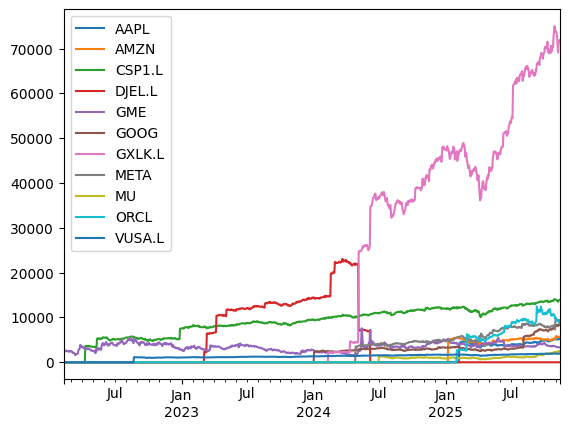

In [81]:
holdings.data.plot()

In [82]:
holdings.transactions.data.index

DatetimeIndex(['2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12',
               '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18',
               ...
               '2025-11-03', '2025-11-04', '2025-11-05', '2025-11-06',
               '2025-11-07', '2025-11-08', '2025-11-09', '2025-11-10',
               '2025-11-11', '2025-11-12'],
              dtype='datetime64[ns]', length=1373, freq='D')

In [83]:
holdings.transactions.data.index

DatetimeIndex(['2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12',
               '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18',
               ...
               '2025-11-03', '2025-11-04', '2025-11-05', '2025-11-06',
               '2025-11-07', '2025-11-08', '2025-11-09', '2025-11-10',
               '2025-11-11', '2025-11-12'],
              dtype='datetime64[ns]', length=1373, freq='D')

<Axes: xlabel='Date'>

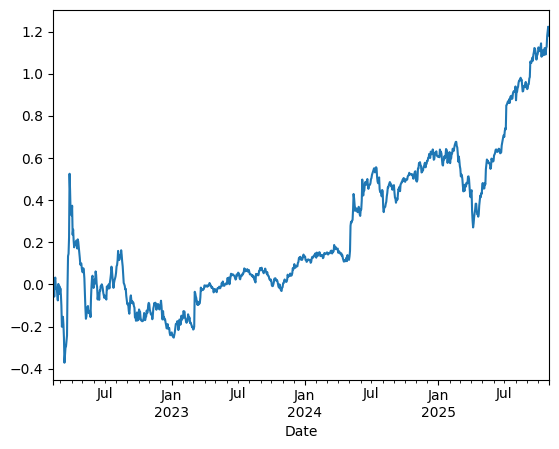

In [84]:
holdings.twr.add(1).cumprod().sub(1).plot()
# holdings.twr[holdings.twr > 0.1].resample("D").sum().fillna(0).plot()

In [85]:
holdings.transactions.data

Ticker,AAPL,AMZN,CSP1.L,DJEL.L,GME,GOOG,GXLK.L,META,MU,ORCL,VUSA.L
2022-02-09,0.0,0.0,0.0,0.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2025-11-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-11-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-11-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-11-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='Date'>

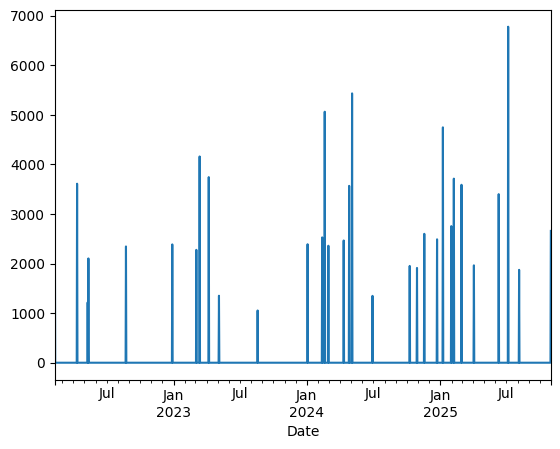

In [86]:
holdings.subscriptions.data["USD"].resample("D").sum().fillna(0).plot()

<Axes: xlabel='Date'>

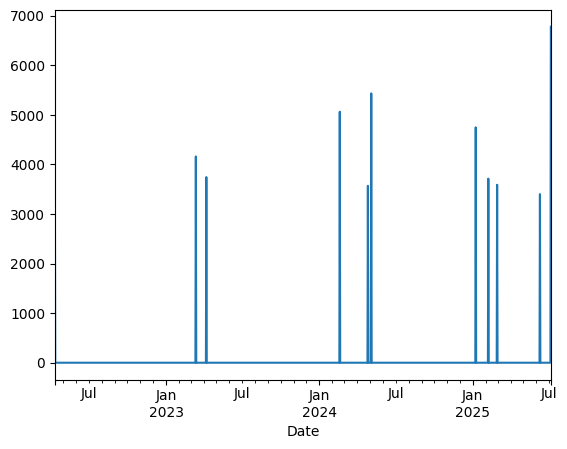

In [87]:
contrs = holdings.subscriptions.data["USD"].resample("D").sum().fillna(0)
contrs[contrs > 3000].resample("D").sum().fillna(0).plot()

<Axes: >

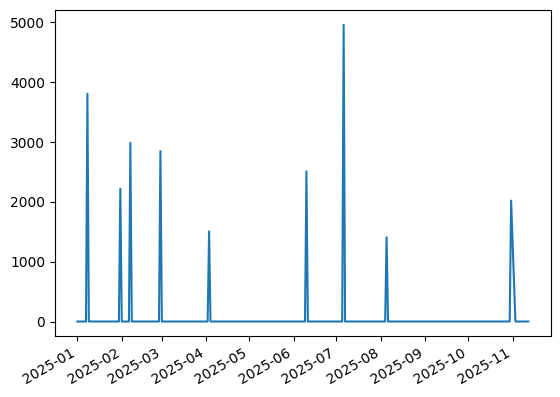

In [88]:
cfs = (
    holdings.subscriptions.data["GBP"]
    # .resample("D")
    # .sum()  # in case of multiple deposits per day
    .reindex(holdings.total.index.union(holdings.subscriptions.data.index))
    .fillna(0.0)
)

cfs["2025":].plot()

In [89]:
holdings.subscriptions.data["GBP"].max()

np.float64(4960.57)

In [90]:
subscriptions.data

,Portfolio,GBP,USD
Date,,,
2022-02-09,LISA,2003.15,2713.780671
2022-02-10,0,0.00,0.000000
2022-02-11,0,0.00,0.000000
2022-02-12,0,0.00,0.000000
2022-02-13,0,0.00,0.000000
...,...,...,...
2025-10-27,0,0.00,0.000000
2025-10-28,0,0.00,0.000000
2025-10-29,0,0.00,0.000000


<Axes: >

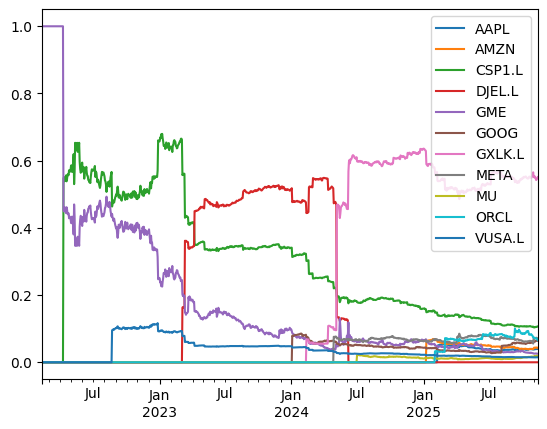

In [91]:
holdings.weights.plot()

In [92]:
bmk = Ticker("^SPX").returns

In [93]:
from src.dataclasses.assessment_config import AssessmentConfig


config = AssessmentConfig(
    returns=holdings.twr,
    rfr=DEFAULT_RFR,
    bmk=bmk,
)

In [94]:
# %tb
from src.evaluation import Evaluation

f = Evaluation(config).run()
pd.Series(f.results)

Beta                 0.922716
CAGR                 0.223901
Max Drawdown        -0.509820
Tracking Error       0.357669
Sharpe Ratio         0.427181
Information Ratio    0.437308
Calmar Ratio         0.439176
dtype: float64

In [95]:
# Had more capital and more focused on active mgmt
# (switched away from majority holding in DOW)
config_active = AssessmentConfig(
    returns=holdings.twr,
    rfr=DEFAULT_RFR,  # 3mo US Tresury
    bmk=bmk,  # SP500
    start="2024",
)

f_active = Evaluation(config_active).run()
pd.Series(f_active.results)

Beta                 0.732483
CAGR                 0.409814
Max Drawdown        -0.242314
Tracking Error       0.194006
Sharpe Ratio         1.120738
Information Ratio    0.856450
Calmar Ratio         1.691255
dtype: float64

In [96]:
from src.evaluation import Evaluation


e = Evaluation(config_active).with_assessments(
    # {AssessmentName.CAGR}
)
e.assessments

2025-11-12 23:30:58 INFO [src.evaluation] Running with filtered assessments


frozendict.frozendict({<AssessmentName.Beta: 'Beta'>: <class 'src.assessments.beta.Beta'>, <AssessmentName.CAGR: 'CAGR'>: <class 'src.assessments.cagr.CAGR'>, <AssessmentName.MaxDrawdown: 'Max Drawdown'>: <class 'src.assessments.max_drawdown.MaxDrawdown'>, <AssessmentName.TrackingError: 'Tracking Error'>: <class 'src.assessments.tracking_error.TrackingError'>, <AssessmentName.SharpeRatio: 'Sharpe Ratio'>: <class 'src.assessments.sharpe_ratio.SharpeRatio'>, <AssessmentName.InformationRatio: 'Information Ratio'>: <class 'src.assessments.information_ratio.InformationRatio'>, <AssessmentName.CalmarRatio: 'Calmar Ratio'>: <class 'src.assessments.calmar_ratio.CalmarRatio'>})

In [97]:
e.run()
e.results

{<AssessmentName.Beta: 'Beta'>: 0.7324825815391952,
 <AssessmentName.CAGR: 'CAGR'>: 0.40981405785068925,
 <AssessmentName.MaxDrawdown: 'Max Drawdown'>: -0.24231362012015,
 <AssessmentName.TrackingError: 'Tracking Error'>: 0.1940064593677326,
 <AssessmentName.SharpeRatio: 'Sharpe Ratio'>: 1.120738025963278,
 <AssessmentName.InformationRatio: 'Information Ratio'>: 0.8564503350995017,
 <AssessmentName.CalmarRatio: 'Calmar Ratio'>: 1.6912547369292943}

In [98]:
# logging.basicConfig(level=logging.INFO)

e.display_timer_stats()

2025-11-12 23:30:58 WARNING [src.evaluation] No timer stats to display. Run evaluation first.


In [99]:
import yfinance as yf

etf = yf.Ticker("SPY")
# holdings = etf
dir(etf)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_analysis',
 '_data',
 '_download_options',
 '_earnings',
 '_earnings_dates',
 '_expirations',
 '_fast_info',
 '_fetch_ticker_tz',
 '_financials',
 '_fundamentals',
 '_funds_data',
 '_get_earnings_dates_using_scrape',
 '_get_earnings_dates_using_screener',
 '_get_ticker_tz',
 '_holders',
 '_isin',
 '_lazy_load_price_history',
 '_message_handler',
 '_news',
 '_options2df',
 '_price_history',
 '_quote',
 '_shares',
 '_tz',
 '_underlying',
 'actions',
 'analyst_price_targets',
 'balance_sheet',
 'balancesheet',
 'calendar',
 'capital_gains',
 'cash_flow',
 'cash

In [100]:
import yahooquery as yq

t = yq.Ticker("SPY")